In [1]:
# to run the code on google colab, uncomment the following lines
!git clone https://github.com/reddybhargava/data_analytics_project-1.git
%cd /content/data_analytics_project-1

Cloning into 'data_analytics_project-1'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 125 (delta 50), reused 101 (delta 32), pack-reused 0
Receiving objects: 100% (125/125), 14.55 MiB | 4.52 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/data_analytics_project-1


In [0]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from functions import knn_classifier
from functions import random_forest_classifier
from functions import xgboost_classifier
from functions import print_confusion_matrix
from functions import voting_classifier

In [0]:
path = '/content/data_analytics_project-1/dataset_modified/'

train_values = pd.read_csv(path + 'train_values.csv')
train_labels = pd.read_csv(path + 'train_labels.csv')
test_values = pd.read_csv(path + 'test_values.csv')

In [0]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(
                                        train_values, train_labels['damage_grade'], 
                                        test_size=0.3, random_state=10
                                    )
X_train = X_train.drop(columns = 'building_id')
X_test = X_test.drop (columns = 'building_id')

### Ensemble Learning using kNN Classifier and RandomForest Classifier

Accuracy of KNeighborsClassifier: 0.7106458090840485


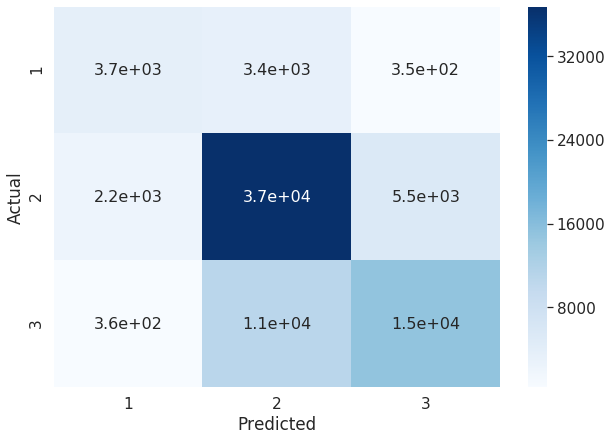

Accuracy of RandomForestClassifier: 0.7195098553356953


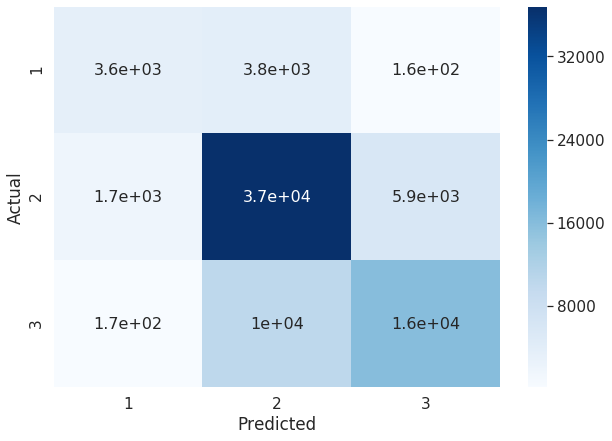


kNN and RandomForest Models Ensemble Classifier
Accuracy of Ensemble of Classifiers: 0.7337076783361687


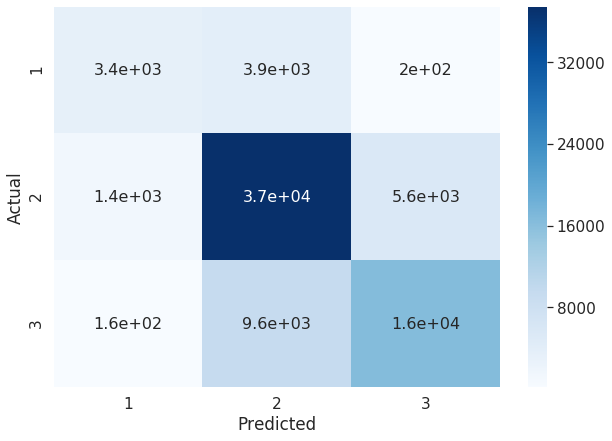

In [5]:
# Ensemble learning using kNN Classifier and RandomForest Classifier

# kNN Classifier
model_knn, y_pred_knn = knn_classifier(X_train,y_train,X_test,y_test)
print_confusion_matrix(y_test,y_pred_knn)

# RandomForest Classifier
model_rfc, y_pred_rfc = random_forest_classifier(X_train,y_train,X_test,y_test,n_estimators=200)
print_confusion_matrix(y_test,y_pred_rfc)

print("\nkNN and RandomForest Models Ensemble Classifier")
# kNN and Random Forest Ensemble Classifier
estimators=[
            ('knn', model_knn), 
            ('rfc', model_rfc),
        ]
voting_type = 'soft'
model_vc, y_pred_vc = voting_classifier(X_train,y_train,X_test,y_test,estimators,voting_type)
print_confusion_matrix(y_test,y_pred_vc)

### Ensemble Learning using kNN Classifier, RandomForest Classifier and XGBoost Classifier

Accuracy of KNeighborsClassifier: 0.7106458090840485


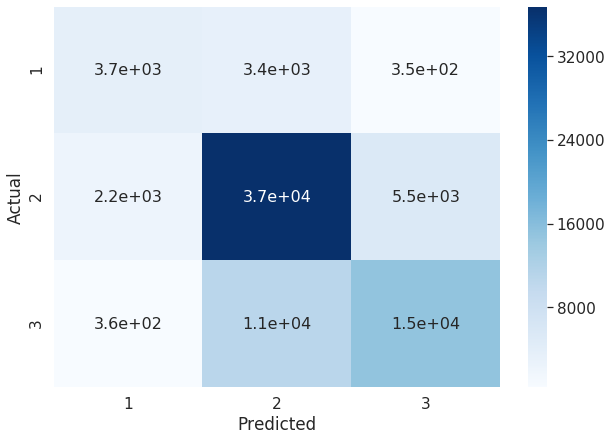

Accuracy of RandomForestClassifier: 0.7193052020311841


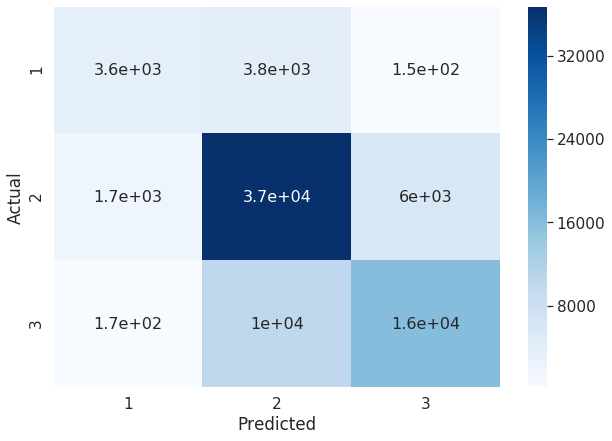

Accuracy of XGBoostClassifier: 0.7444775584860772


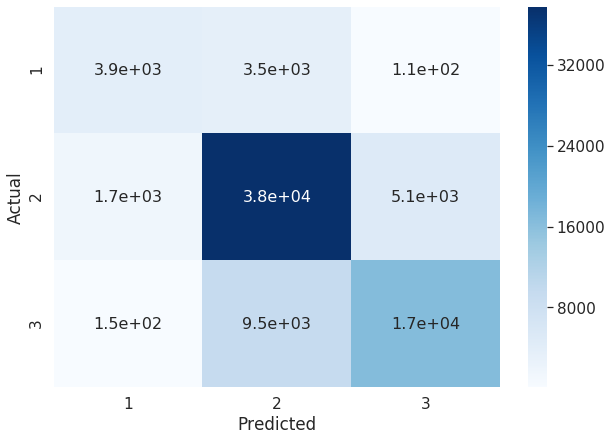


kNN, RandomForest and XGBoost Models Ensemble Classifier
Accuracy of Ensemble of Classifiers: 0.7458845499545925


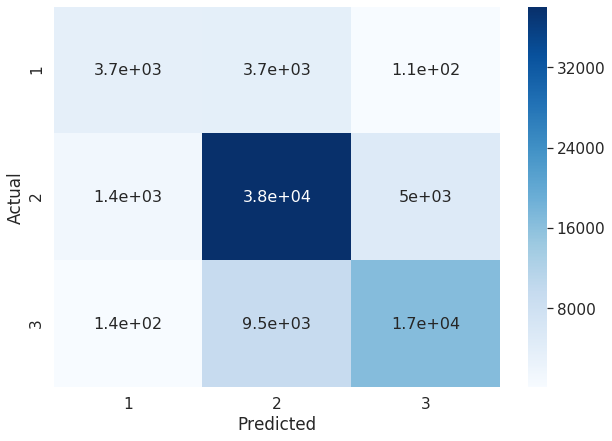

In [6]:
# Ensemble learning using kNN Classifier, RandomForest Classifier and XGBoost Classifier

# kNN Classifier
model_knn, y_pred_knn = knn_classifier(X_train,y_train,X_test,y_test,n_neighbors=8)
print_confusion_matrix(y_test,y_pred_knn)

# RandomForest Classifier
model_rfc, y_pred_rfc = random_forest_classifier(X_train,y_train,X_test,y_test,n_estimators=200)
print_confusion_matrix(y_test,y_pred_rfc)

# XGBoost Classifier
param = {
        'learning_rate': 0.3,
        'subsample': 0.8, 
        'min_child_weight': 5, 
        'max_depth': 10, 
        'gamma': 0.3, 
        'colsample_bytree': 0.8,
        'objective': 'multi:softmax',
        'num_class': 3,
        'eval_metric': 'merror'
    }
model_xgb, y_pred_xgb = xgboost_classifier(X_train,y_train,X_test,y_test,params=param)
print_confusion_matrix(y_test,y_pred_xgb)

# kNN, RandomForest and XGBoost Ensemble Classifier
print("\nkNN, RandomForest and XGBoost Models Ensemble Classifier")
estimators = [
            ('knn', model_knn), 
            ('rfc', model_rfc),
            ('xgb', model_xgb)
           ]
voting_type = 'soft'
model_vc, y_pred_vc = voting_classifier(X_train,y_train,X_test,y_test,estimators,voting_type)
print_confusion_matrix(y_test,y_pred_vc)